In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from collections import Counter
from datetime import date, time, timedelta
from scipy.fftpack import rfft
import warnings
import math
from sklearn.cluster import DBSCAN


In [2]:
# Reading insulin dataframe file

insulin_data_frame = pd.read_csv("InsulinData.csv", low_memory=False)

In [3]:
insulin_data_frame

,Index,Date,Time,New Device Time,BG Reading (mg/dL),Linked BG Meter ID,Basal Rate (U/h),Temp Basal Amount,Temp Basal Type,Temp Basal Duration (h:mm:ss),...,Scroll Step Size,Insulin Action Curve Time,Sensor Calibration Rejected Reason,Preset Bolus,Bolus Source,Network Device Associated Reason,Network Device Disassociated Reason,Network Device Disconnected Reason,Sensor Exception,Preset Temp Basal Name
0,0,2/12/2018,13:20:53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,TEMPORARY,NaN,NaN,NaN,NaN
1,1,2/12/2018,13:20:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2/12/2018,13:18:48,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2/12/2018,13:18:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2/12/2018,13:12:33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,CLOSED_LOOP_MICRO_BOLUS,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41430,22135,7/24/2017,19:00:01,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41431,22136,7/24/2017,18:59:44,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41432,22137,7/24/2017,18:59:44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41433,22138,7/24/2017,18:59:44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
insulin_data_frame = insulin_data_frame[["Date", "Time", "BWZ Carb Input (grams)"]]

In [5]:
cgm_data_frame = pd.read_csv("CGMData.csv", low_memory=False)

In [6]:
cgm_data_frame = cgm_data_frame[["Date", "Time", "Sensor Glucose (mg/dL)"]]

In [7]:
cgm_data_frame["Timestamp"] = pd.to_datetime(cgm_data_frame["Date"] + ' '+ cgm_data_frame["Time"])

In [8]:
cgm_data_frame

,Date,Time,Sensor Glucose (mg/dL),Timestamp
0,2/12/2018,13:22:27,118.0,2018-02-12 13:22:27
1,2/12/2018,13:17:27,122.0,2018-02-12 13:17:27
2,2/12/2018,13:12:27,NaN,2018-02-12 13:12:27
3,2/12/2018,13:07:27,NaN,2018-02-12 13:07:27
4,2/12/2018,13:02:27,NaN,2018-02-12 13:02:27
...,...,...,...,...
55338,7/25/2017,12:28:54,311.0,2017-07-25 12:28:54
55339,7/25/2017,12:23:54,311.0,2017-07-25 12:23:54
55340,7/25/2017,12:18:54,309.0,2017-07-25 12:18:54
55341,7/25/2017,12:13:54,310.0,2017-07-25 12:13:54


In [9]:
insulin_data_frame["Timestamp"] = pd.to_datetime(insulin_data_frame["Date"] + ' ' + insulin_data_frame["Time"])

/var/folders/ps/lq6nm9611sj376j04cd4y41r0000gn/T/ipykernel_7697/2465177105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insulin_data_frame["Timestamp"] = pd.to_datetime(insulin_data_frame["Date"] + ' ' + insulin_data_frame["Time"])


In [10]:
insulin_data_frame

,Date,Time,BWZ Carb Input (grams),Timestamp
0,2/12/2018,13:20:53,NaN,2018-02-12 13:20:53
1,2/12/2018,13:20:48,NaN,2018-02-12 13:20:48
2,2/12/2018,13:18:48,NaN,2018-02-12 13:18:48
3,2/12/2018,13:18:48,NaN,2018-02-12 13:18:48
4,2/12/2018,13:12:33,NaN,2018-02-12 13:12:33
...,...,...,...,...
41430,7/24/2017,19:00:01,NaN,2017-07-24 19:00:01
41431,7/24/2017,18:59:44,NaN,2017-07-24 18:59:44
41432,7/24/2017,18:59:44,NaN,2017-07-24 18:59:44
41433,7/24/2017,18:59:44,NaN,2017-07-24 18:59:44


In [11]:

insulin_data_frame_copy = insulin_data_frame.copy()  
insulin_data_frame_copy = insulin_data_frame_copy.set_index('Timestamp')
insulin_data_frame_copy = insulin_data_frame_copy.sort_values(by="Timestamp" , ascending=True)
insulin_data_frame_copy = insulin_data_frame_copy.dropna().reset_index()
insulin_data_frame_copy['BWZ Carb Input (grams)'].replace(0.0, np.nan, inplace=True)
insulin_data_frame_copy = insulin_data_frame_copy.dropna()
insulin_data_frame_copy = insulin_data_frame_copy.reset_index().drop(columns="index")

In [12]:

insulin_data_frame_copy

,Timestamp,Date,Time,BWZ Carb Input (grams)
0,2017-07-25 10:21:19,7/25/2017,10:21:19,91.0
1,2017-07-25 10:39:46,7/25/2017,10:39:46,58.0
2,2017-07-25 18:31:40,7/25/2017,18:31:40,115.0
3,2017-07-26 09:27:16,7/26/2017,9:27:16,72.0
4,2017-07-26 11:24:52,7/26/2017,11:24:52,20.0
...,...,...,...,...
742,2018-02-11 16:27:04,2/11/2018,16:27:04,40.0
743,2018-02-11 18:14:37,2/11/2018,18:14:37,8.0
744,2018-02-11 20:33:18,2/11/2018,20:33:18,71.0
745,2018-02-12 02:30:55,2/12/2018,2:30:55,15.0


In [13]:
def creatingList(insulin_data_1_df_new):
    valid_timestamp_list = []
    two_hour_thirty_mins = 150
    for index, ts in enumerate(insulin_data_1_df_new['Timestamp']):
        try:
            valid_tm = (insulin_data_1_df_new['Timestamp'][index+1] -ts).seconds / 60.0
            if valid_tm >=150:
                valid_timestamp_list.append(ts)
                
        except KeyError:
            break
    
    return valid_timestamp_list

In [14]:
valid_timestamp_list = creatingList(insulin_data_frame_copy)

In [15]:
def creatingMealData(valid_timestamp_list, cgm_data_1_df):
    
    cgmDataList = []
    
    for index, ts in enumerate(valid_timestamp_list):
        start_offset_thirty_minutes = pd.to_datetime(ts - pd.Timedelta(value=30, unit="T"))
        end_offset_oneTwenty_minutes = pd.to_datetime(ts - pd.Timedelta(value=2, unit="H"))
        fetch_date = ts.date().strftime('%-m/%-d/%Y')
        cgmDataList.append(cgm_data_1_df.loc[cgm_data_1_df['Date']==fetch_date].set_index('Timestamp').between_time
                           (start_time=start_offset_thirty_minutes.strftime('%-H:%-M:%-S'),
                            end_time=end_offset_oneTwenty_minutes.strftime('%-H:%-M:%-S'))['Sensor Glucose (mg/dL)'].values.tolist())
        
        
    return pd.DataFrame(cgmDataList)

In [16]:
meal_data_frame = creatingMealData(valid_timestamp_list,cgm_data_frame)

In [17]:
meal_data_frame = meal_data_frame.iloc[:,0:30]

In [18]:
meal_data_frame

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,65.0,64.0,64.0,65.0,64.0,62.0,59.0,57.0,54.0,53.0,...,64.0,66.0,65.0,63.0,66.0,71.0,77.0,82.0,85.0,92.0
1,65.0,64.0,64.0,65.0,64.0,62.0,59.0,57.0,54.0,53.0,...,64.0,66.0,65.0,63.0,66.0,71.0,77.0,82.0,85.0,92.0
2,149.0,144.0,139.0,139.0,144.0,147.0,146.0,144.0,138.0,134.0,...,99.0,99.0,99.0,98.0,96.0,96.0,98.0,103.0,106.0,105.0
3,149.0,144.0,139.0,139.0,144.0,147.0,146.0,144.0,138.0,134.0,...,99.0,99.0,99.0,98.0,96.0,96.0,98.0,103.0,106.0,105.0
4,135.0,139.0,142.0,147.0,153.0,159.0,164.0,168.0,173.0,175.0,...,170.0,167.0,158.0,152.0,146.0,140.0,137.0,139.0,148.0,155.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,77.0,79.0,79.0,73.0,69.0,67.0,68.0,70.0,67.0,66.0,...,78.0,80.0,83.0,87.0,89.0,95.0,106.0,114.0,136.0,155.0
563,250.0,245.0,250.0,247.0,243.0,227.0,213.0,205.0,182.0,175.0,...,201.0,189.0,162.0,166.0,173.0,176.0,169.0,167.0,166.0,168.0
564,250.0,245.0,250.0,247.0,243.0,227.0,213.0,205.0,182.0,175.0,...,201.0,189.0,162.0,166.0,173.0,176.0,169.0,167.0,166.0,168.0
565,250.0,245.0,250.0,247.0,243.0,227.0,213.0,205.0,182.0,175.0,...,201.0,189.0,162.0,166.0,173.0,176.0,169.0,167.0,166.0,168.0


In [19]:
df = pd.DataFrame(valid_timestamp_list, columns=["Timestamp"]).set_index("Timestamp")

In [20]:
df

""
Timestamp
2017-07-25 10:39:46
2017-07-25 18:31:40
2017-07-26 12:48:41
2017-07-26 19:15:06
2017-07-27 05:45:51
...
2018-02-10 19:46:28
2018-02-11 10:02:19
2018-02-11 12:43:23


In [21]:
meal_data_frame["Timestamp"] = valid_timestamp_list

In [22]:
meal_data_frame.set_index("Timestamp", inplace=True)

In [23]:
meal_data_frame

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
Timestamp,,,,,,,,,,,,,,,,,,,,,
2017-07-25 10:39:46,65.0,64.0,64.0,65.0,64.0,62.0,59.0,57.0,54.0,53.0,...,64.0,66.0,65.0,63.0,66.0,71.0,77.0,82.0,85.0,92.0
2017-07-25 18:31:40,65.0,64.0,64.0,65.0,64.0,62.0,59.0,57.0,54.0,53.0,...,64.0,66.0,65.0,63.0,66.0,71.0,77.0,82.0,85.0,92.0
2017-07-26 12:48:41,149.0,144.0,139.0,139.0,144.0,147.0,146.0,144.0,138.0,134.0,...,99.0,99.0,99.0,98.0,96.0,96.0,98.0,103.0,106.0,105.0
2017-07-26 19:15:06,149.0,144.0,139.0,139.0,144.0,147.0,146.0,144.0,138.0,134.0,...,99.0,99.0,99.0,98.0,96.0,96.0,98.0,103.0,106.0,105.0
2017-07-27 05:45:51,135.0,139.0,142.0,147.0,153.0,159.0,164.0,168.0,173.0,175.0,...,170.0,167.0,158.0,152.0,146.0,140.0,137.0,139.0,148.0,155.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-10 19:46:28,77.0,79.0,79.0,73.0,69.0,67.0,68.0,70.0,67.0,66.0,...,78.0,80.0,83.0,87.0,89.0,95.0,106.0,114.0,136.0,155.0
2018-02-11 10:02:19,250.0,245.0,250.0,247.0,243.0,227.0,213.0,205.0,182.0,175.0,...,201.0,189.0,162.0,166.0,173.0,176.0,169.0,167.0,166.0,168.0
2018-02-11 12:43:23,250.0,245.0,250.0,247.0,243.0,227.0,213.0,205.0,182.0,175.0,...,201.0,189.0,162.0,166.0,173.0,176.0,169.0,167.0,166.0,168.0


In [24]:
indexes_to_clean = meal_data_frame.isna().sum(axis=1).replace(0,np.nan).dropna().where(lambda x: x > 6).dropna().index

In [25]:
indexes_to_clean

DatetimeIndex(['2017-08-07 05:40:08', '2017-08-07 09:43:33',
               '2017-08-07 12:44:49', '2017-08-07 19:16:15',
               '2017-08-13 08:36:15', '2017-08-13 13:00:40',
               '2017-08-13 17:11:09', '2017-08-21 11:53:13',
               '2017-08-21 14:33:54', '2017-08-28 09:37:32',
               '2017-08-28 14:48:52', '2017-08-28 18:21:22',
               '2017-10-07 18:15:22', '2017-10-08 00:28:39',
               '2017-10-25 09:34:13', '2017-10-25 14:19:40',
               '2017-10-25 19:18:52', '2017-11-01 09:38:12',
               '2017-11-01 12:20:13', '2017-11-01 17:52:28',
               '2017-11-21 09:53:22', '2017-11-21 13:48:21',
               '2017-11-21 17:59:40', '2017-11-28 09:59:31',
               '2017-11-28 15:16:29', '2017-12-13 06:23:26',
               '2017-12-13 09:26:22', '2017-12-13 17:54:16',
               '2017-12-19 05:57:02', '2017-12-19 09:11:21',
               '2017-12-19 15:44:30', '2018-01-22 09:44:01',
               '2018-01-

In [26]:
meal_data_frame = meal_data_frame.dropna()

In [27]:
meal_data_frame  = meal_data_frame.interpolate(method='linear', axis=1)

In [28]:
meal_data_frame

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
Timestamp,,,,,,,,,,,,,,,,,,,,,
2017-07-25 10:39:46,65.0,64.0,64.0,65.0,64.0,62.0,59.0,57.0,54.0,53.0,...,64.0,66.0,65.0,63.0,66.0,71.0,77.0,82.0,85.0,92.0
2017-07-25 18:31:40,65.0,64.0,64.0,65.0,64.0,62.0,59.0,57.0,54.0,53.0,...,64.0,66.0,65.0,63.0,66.0,71.0,77.0,82.0,85.0,92.0
2017-07-26 12:48:41,149.0,144.0,139.0,139.0,144.0,147.0,146.0,144.0,138.0,134.0,...,99.0,99.0,99.0,98.0,96.0,96.0,98.0,103.0,106.0,105.0
2017-07-26 19:15:06,149.0,144.0,139.0,139.0,144.0,147.0,146.0,144.0,138.0,134.0,...,99.0,99.0,99.0,98.0,96.0,96.0,98.0,103.0,106.0,105.0
2017-07-27 05:45:51,135.0,139.0,142.0,147.0,153.0,159.0,164.0,168.0,173.0,175.0,...,170.0,167.0,158.0,152.0,146.0,140.0,137.0,139.0,148.0,155.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-10 14:48:11,77.0,79.0,79.0,73.0,69.0,67.0,68.0,70.0,67.0,66.0,...,78.0,80.0,83.0,87.0,89.0,95.0,106.0,114.0,136.0,155.0
2018-02-10 19:46:28,77.0,79.0,79.0,73.0,69.0,67.0,68.0,70.0,67.0,66.0,...,78.0,80.0,83.0,87.0,89.0,95.0,106.0,114.0,136.0,155.0
2018-02-11 10:02:19,250.0,245.0,250.0,247.0,243.0,227.0,213.0,205.0,182.0,175.0,...,201.0,189.0,162.0,166.0,173.0,176.0,169.0,167.0,166.0,168.0


In [29]:
ts_list = []
ts_list = meal_data_frame.index


In [30]:
ts_list

DatetimeIndex(['2017-07-25 10:39:46', '2017-07-25 18:31:40',
               '2017-07-26 12:48:41', '2017-07-26 19:15:06',
               '2017-07-27 05:45:51', '2017-07-27 09:19:41',
               '2017-07-27 13:56:49', '2017-07-27 18:58:04',
               '2017-07-28 08:49:55', '2017-07-28 15:16:56',
               ...
               '2018-02-08 09:34:11', '2018-02-08 15:20:31',
               '2018-02-08 22:24:34', '2018-02-09 10:21:46',
               '2018-02-09 15:07:13', '2018-02-10 14:48:11',
               '2018-02-10 19:46:28', '2018-02-11 10:02:19',
               '2018-02-11 12:43:23', '2018-02-11 20:33:18'],
              dtype='datetime64[ns]', name='Timestamp', length=440, freq=None)

In [31]:
len(ts_list)

440

In [32]:
def createMealFeatureDataMatrix(meal_cleaned_df):
    power_second_max = []
    power_third_max = []
    List1=[]
    differential_data = []
    standard_deviation = []
    for i in range(len(meal_cleaned_df)):
        array = abs(rfft(meal_cleaned_df.iloc[:,0:30].iloc[i].values.tolist())).tolist()
        sorted_array = abs(rfft(meal_cleaned_df.iloc[:,0:30].iloc[i].values.tolist())).tolist()
        sorted_array.sort()
    
        power_second_max.append(sorted_array[-3])
        power_third_max.append(sorted_array[-4])
    
    TimeMeal = meal_cleaned_df.iloc[:,22:25].idxmin(axis=1)
    MaximumGlucoseLevels = meal_cleaned_df.iloc[:,5:19].idxmax(axis=1)


    for i in range(len(meal_cleaned_df)):
        List1.append(np.diff(meal_cleaned_df.iloc[:,MaximumGlucoseLevels[i]:TimeMeal[i]].iloc[i].tolist()).max())
        differential_data.append(np.diff(meal_cleaned_df.iloc[:,MaximumGlucoseLevels[i]:TimeMeal[i]].iloc[i].tolist()).max())
        standard_deviation.append(np.std(meal_cleaned_df.iloc[i]))
    
    meal_data_feature_matrix = pd.DataFrame()
    meal_data_feature_matrix['Power II Max'] = power_second_max
    meal_data_feature_matrix['Power III Max'] = power_third_max
    meal_data_feature_matrix['II Differential'] = differential_data
    meal_data_feature_matrix['Standard Deviation'] = standard_deviation

    return meal_data_feature_matrix

In [33]:
meal_feature_matrix = createMealFeatureDataMatrix(meal_data_frame)

In [34]:
meal_feature_matrix["Timestamp"] = ts_list
meal_feature_matrix.set_index("Timestamp", inplace=True)


In [35]:
meal_feature_matrix

,Power II Max,Power III Max,II Differential,Standard Deviation
Timestamp,,,,
2017-07-25 10:39:46,84.669454,83.279018,2.0,8.760327
2017-07-25 18:31:40,84.669454,83.279018,2.0,8.760327
2017-07-26 12:48:41,112.379708,93.787254,3.0,19.035756
2017-07-26 19:15:06,112.379708,93.787254,3.0,19.035756
2017-07-27 05:45:51,72.034923,66.896154,5.0,12.183960
...,...,...,...,...
2018-02-10 14:48:11,200.720503,155.123800,5.0,21.941868
2018-02-10 19:46:28,200.720503,155.123800,5.0,21.941868
2018-02-11 10:02:19,358.253840,204.510328,17.0,30.809739


In [36]:
def creatingBinsFromInsulinCopy(ts_list, insulin_data_frame_copy):
    
    for index, ts in enumerate(ts_list):
        new_insulin_copy = insulin_data_frame_copy[insulin_data_frame_copy['Timestamp'].isin(ts_list)]
        
    new_insulin_copy = new_insulin_copy.reset_index().drop(columns="index")
    
    minimum_carb = new_insulin_copy["BWZ Carb Input (grams)"].min()
    maximum_carb = new_insulin_copy["BWZ Carb Input (grams)"].max()
    numberOfBins = round((maximum_carb - minimum_carb)/20)
    
    binOneMin = minimum_carb
    binOneMax = minimum_carb + 20

    binTwoMin = binOneMax + 1
    binTwoMax = binTwoMin + 20

    binThreeMin = binTwoMax + 1
    binThreeMax = binThreeMin + 20


    binFourMin = binThreeMax + 1
    binFourMax = binFourMin + 20

    binFiveMin = binFourMax + 1
    binFiveMax = binFiveMin + 20

    binSixMin = binFiveMax + 1
    binSixMax = binSixMin + 20
    
    binList = []
    for index, ts in enumerate(new_insulin_copy["BWZ Carb Input (grams)"]):
    
        if ts >= binOneMin and ts <=binOneMax:
            binList.append(0)
    
        elif ts >= binTwoMin and ts <=binTwoMax:
            binList.append(1)
    
        elif ts >= binThreeMin and ts <=binThreeMax:
            binList.append(2)
        
        elif ts >= binFourMin and ts <=binFourMax:
            binList.append(3)
        
        elif ts >= binFiveMin and ts <=binFiveMax:
            binList.append(4)
        
        elif ts >= binSixMin and ts <=binSixMax:
            binList.append(5)
    
    
    return new_insulin_copy, binList

In [37]:
new_insulin_copy, binList = creatingBinsFromInsulinCopy(ts_list, insulin_data_frame_copy)

In [38]:
new_insulin_copy

,Timestamp,Date,Time,BWZ Carb Input (grams)
0,2017-07-25 10:39:46,7/25/2017,10:39:46,58.0
1,2017-07-25 18:31:40,7/25/2017,18:31:40,115.0
2,2017-07-26 12:48:41,7/26/2017,12:48:41,63.0
3,2017-07-26 19:15:06,7/26/2017,19:15:06,60.0
4,2017-07-27 05:45:51,7/27/2017,5:45:51,24.0
...,...,...,...,...
435,2018-02-10 14:48:11,2/10/2018,14:48:11,90.0
436,2018-02-10 19:46:28,2/10/2018,19:46:28,40.0
437,2018-02-11 10:02:19,2/11/2018,10:02:19,10.0
438,2018-02-11 12:43:23,2/11/2018,12:43:23,27.0


In [39]:
len(binList)

440

In [40]:
meal_feature_matrix

,Power II Max,Power III Max,II Differential,Standard Deviation
Timestamp,,,,
2017-07-25 10:39:46,84.669454,83.279018,2.0,8.760327
2017-07-25 18:31:40,84.669454,83.279018,2.0,8.760327
2017-07-26 12:48:41,112.379708,93.787254,3.0,19.035756
2017-07-26 19:15:06,112.379708,93.787254,3.0,19.035756
2017-07-27 05:45:51,72.034923,66.896154,5.0,12.183960
...,...,...,...,...
2018-02-10 14:48:11,200.720503,155.123800,5.0,21.941868
2018-02-10 19:46:28,200.720503,155.123800,5.0,21.941868
2018-02-11 10:02:19,358.253840,204.510328,17.0,30.809739


In [41]:
meal_feature_matrix.describe()

,Power II Max,Power III Max,II Differential,Standard Deviation
count,440.000000,440.000000,440.000000,440.000000
mean,188.870062,128.278008,4.165909,22.378107
std,135.405045,92.562054,4.967523,16.037972
min,17.180340,14.271261,-5.000000,2.581128
25%,98.138468,65.586953,1.000000,12.103572
50%,149.895133,105.428342,3.000000,16.762425
75%,254.935225,158.160803,6.000000,29.659344
max,898.144054,694.127578,33.000000,107.448701


In [42]:
scaler = MinMaxScaler()
scaler.fit(meal_feature_matrix)

MinMaxScaler()

In [43]:
meal_feature_matrix_copy = meal_feature_matrix.copy()

In [44]:
meal_feature_matrix_copy

,Power II Max,Power III Max,II Differential,Standard Deviation
Timestamp,,,,
2017-07-25 10:39:46,84.669454,83.279018,2.0,8.760327
2017-07-25 18:31:40,84.669454,83.279018,2.0,8.760327
2017-07-26 12:48:41,112.379708,93.787254,3.0,19.035756
2017-07-26 19:15:06,112.379708,93.787254,3.0,19.035756
2017-07-27 05:45:51,72.034923,66.896154,5.0,12.183960
...,...,...,...,...
2018-02-10 14:48:11,200.720503,155.123800,5.0,21.941868
2018-02-10 19:46:28,200.720503,155.123800,5.0,21.941868
2018-02-11 10:02:19,358.253840,204.510328,17.0,30.809739


In [45]:
meal_feature_matrix_copy[["Power II Max_T","Power III Max_T","II Differential_T","Standard Deviation_T" ]] = scaler.transform(
        meal_feature_matrix[["Power II Max","Power III Max","II Differential","Standard Deviation"]])

In [46]:
meal_feature_matrix_copy

,Power II Max,Power III Max,II Differential,Standard Deviation,Power II Max_T,Power III Max_T,II Differential_T,Standard Deviation_T
Timestamp,,,,,,,,
2017-07-25 10:39:46,84.669454,83.279018,2.0,8.760327,0.076608,0.101503,0.184211,0.058924
2017-07-25 18:31:40,84.669454,83.279018,2.0,8.760327,0.076608,0.101503,0.184211,0.058924
2017-07-26 12:48:41,112.379708,93.787254,3.0,19.035756,0.108063,0.116960,0.210526,0.156909
2017-07-26 19:15:06,112.379708,93.787254,3.0,19.035756,0.108063,0.116960,0.210526,0.156909
2017-07-27 05:45:51,72.034923,66.896154,5.0,12.183960,0.062267,0.077406,0.263158,0.091571
...,...,...,...,...,...,...,...,...
2018-02-10 14:48:11,200.720503,155.123800,5.0,21.941868,0.208340,0.207180,0.263158,0.184621
2018-02-10 19:46:28,200.720503,155.123800,5.0,21.941868,0.208340,0.207180,0.263158,0.184621
2018-02-11 10:02:19,358.253840,204.510328,17.0,30.809739,0.387160,0.279822,0.578947,0.269183


In [47]:
meal_feature_matrix_copy.drop(['Power II Max','Power III Max','II Differential', 'Standard Deviation'],axis=1, inplace=True)

In [48]:
meal_feature_matrix_copy

,Power II Max_T,Power III Max_T,II Differential_T,Standard Deviation_T
Timestamp,,,,
2017-07-25 10:39:46,0.076608,0.101503,0.184211,0.058924
2017-07-25 18:31:40,0.076608,0.101503,0.184211,0.058924
2017-07-26 12:48:41,0.108063,0.116960,0.210526,0.156909
2017-07-26 19:15:06,0.108063,0.116960,0.210526,0.156909
2017-07-27 05:45:51,0.062267,0.077406,0.263158,0.091571
...,...,...,...,...
2018-02-10 14:48:11,0.208340,0.207180,0.263158,0.184621
2018-02-10 19:46:28,0.208340,0.207180,0.263158,0.184621
2018-02-11 10:02:19,0.387160,0.279822,0.578947,0.269183


In [49]:
kmeans_data = meal_feature_matrix_copy
kmeans_data = kmeans_data.values.astype('float32', copy=False)
kmeans_data

array([[0.07660828, 0.10150345, 0.18421052, 0.05892383],
       [0.07660828, 0.10150345, 0.18421052, 0.05892383],
       [0.10806276, 0.11696   , 0.21052632, 0.15690863],
       ...,
       [0.38715953, 0.27982247, 0.57894737, 0.2691834 ],
       [0.38715953, 0.27982247, 0.57894737, 0.2691834 ],
       [0.38715953, 0.27982247, 0.57894737, 0.2691834 ]], dtype=float32)

In [50]:
def optimise_k_means(meal_feature_matrix, k):
    
    means = []
    inertias = []
    
    for k in range(1, k):
        kmeans = KMeans(n_clusters=k, n_init='auto')
        kmeans.fit(meal_feature_matrix)
        means.append(k)
        inertias.append(kmeans.inertia_)
        
    fig = plt.subplots(figsize=(10,5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel("Number of clusters")
    plt.ylabel("Inertia")
    plt.grid(True)
    plt.show()


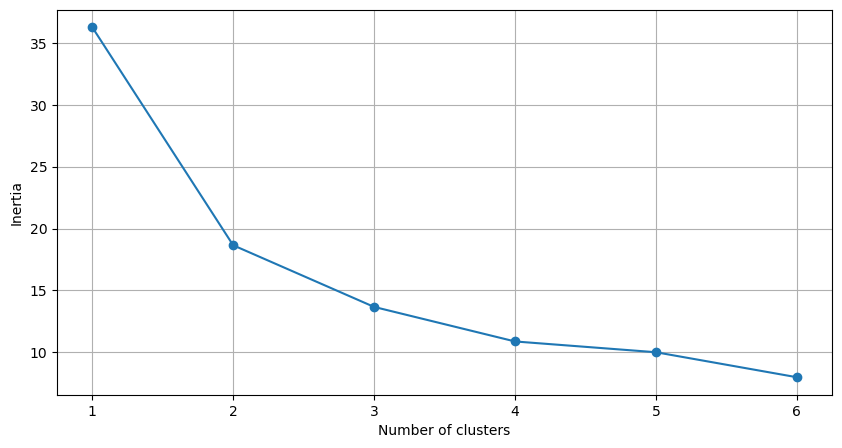

In [51]:
optimise_k_means(kmeans_data, 7)

In [52]:
# Find the SSE at each cluster level
k_range = range(1,7)
SSE_List = []

for k in k_range:
    km_test = KMeans(n_clusters=k, n_init='auto')
    
    km_test.fit(kmeans_data)
    SSE_List.append(km_test.inertia_)

In [53]:
SSE_List

[36.27842330932617,
 18.648250579833984,
 13.772537231445312,
 10.883091926574707,
 9.671217918395996,
 8.51738452911377]

In [54]:
km = KMeans(n_clusters=6)
km

KMeans(n_clusters=6)

In [55]:
y_preds = km.fit_predict(kmeans_data)

/Users/skhand17/Desktop/ml-course/Project-III/env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [56]:
y_preds

array([0, 0, 3, 3, 0, 0, 0, 0, 3, 3, 3, 2, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 0,
       0, 0, 3, 3, 3, 3, 5, 5, 5, 5, 3, 3, 3, 0, 0, 0, 0, 0, 0, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 0, 0, 0, 3, 3, 3, 0, 0, 2, 2, 2, 0, 4, 4, 4, 1,
       1, 1, 1, 0, 0, 0, 4, 4, 4, 0, 0, 0, 3, 3, 3, 4, 4, 4, 4, 3, 3, 3,
       4, 4, 4, 3, 3, 0, 0, 0, 0, 3, 3, 0, 0, 0, 4, 4, 4, 0, 0, 0, 0, 4,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0,
       1, 1, 3, 3, 3, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 3, 3, 3, 1, 1, 1, 4,
       4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2,
       1, 3, 3, 2, 3, 3, 3, 0, 0, 0, 2, 2, 2, 1, 1, 0, 0, 0, 3, 3, 3, 3,
       3, 4, 4, 1, 1, 1, 3, 3, 3, 3, 3, 4, 2, 1, 1, 1, 3, 3, 3, 3, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 3, 3, 3, 3, 3, 3, 0, 0,
       0, 0, 3, 3, 3, 3, 3, 3, 1, 1, 0, 0, 0, 0, 3,

In [57]:
KMeans_sse = km.inertia_

In [58]:
KMeans_sse

7.903161525726318

In [59]:
meal_feature_matrix_copy['Clusters Predicted'] = y_preds
meal_feature_matrix_copy

,Power II Max_T,Power III Max_T,II Differential_T,Standard Deviation_T,Clusters Predicted
Timestamp,,,,,
2017-07-25 10:39:46,0.076608,0.101503,0.184211,0.058924,0
2017-07-25 18:31:40,0.076608,0.101503,0.184211,0.058924,0
2017-07-26 12:48:41,0.108063,0.116960,0.210526,0.156909,3
2017-07-26 19:15:06,0.108063,0.116960,0.210526,0.156909,3
2017-07-27 05:45:51,0.062267,0.077406,0.263158,0.091571,0
...,...,...,...,...,...
2018-02-10 14:48:11,0.208340,0.207180,0.263158,0.184621,3
2018-02-10 19:46:28,0.208340,0.207180,0.263158,0.184621,3
2018-02-11 10:02:19,0.387160,0.279822,0.578947,0.269183,4


In [60]:
km.cluster_centers_

array([[0.06196104, 0.05508081, 0.18927126, 0.06094936],
       [0.32084024, 0.25836876, 0.2458134 , 0.30814153],
       [0.53446895, 0.43329698, 0.26413256, 0.48712593],
       [0.14807302, 0.13256745, 0.20572546, 0.14877121],
       [0.20874588, 0.19308835, 0.52118105, 0.18599813],
       [0.7596711 , 0.7753472 , 0.15789473, 0.8711984 ]], dtype=float32)

In [61]:
# bins_dataframe = pd.DataFrame({"binList": binList, 'kmeans_labels' : list(y_preds)}, columns=['Ground Truth Value', 'Kmeans_labels'])

In [62]:
bins_dataframe = pd.DataFrame()


In [63]:
bins_dataframe

""


In [64]:
bins_dataframe['Ground Truth Value'] = binList
bins_dataframe['Predicted Value'] = list(y_preds)

In [65]:
bins_dataframe

,Ground Truth Value,Predicted Value
0,2,0
1,5,0
2,2,3
3,2,3
4,0,0
...,...,...
435,4,3
436,1,3
437,0,4
438,1,4


In [66]:
confusion_matrix = pd.pivot_table(bins_dataframe, index='Predicted Value', columns='Ground Truth Value', aggfunc=len)

In [67]:
confusion_matrix.fillna(value=0,inplace=True)

In [68]:
confusion_matrix

Ground Truth Value,0,1,2,3,4,5
Predicted Value,,,,,,
0,38.0,51.0,25.0,8.0,5.0,3.0
1,34.0,22.0,13.0,13.0,6.0,0.0
2,8.0,5.0,5.0,4.0,4.0,1.0
3,50.0,46.0,29.0,15.0,7.0,1.0
4,11.0,11.0,12.0,4.0,3.0,0.0
5,3.0,3.0,0.0,0.0,0.0,0.0


In [69]:
confusion_matrix = confusion_matrix.reset_index()

In [70]:
confusion_matrix = confusion_matrix.drop(columns=['Predicted Value'])

In [71]:
confusion_matrix

Ground Truth Value,0,1,2,3,4,5
0,38.0,51.0,25.0,8.0,5.0,3.0
1,34.0,22.0,13.0,13.0,6.0,0.0
2,8.0,5.0,5.0,4.0,4.0,1.0
3,50.0,46.0,29.0,15.0,7.0,1.0
4,11.0,11.0,12.0,4.0,3.0,0.0
5,3.0,3.0,0.0,0.0,0.0,0.0


In [72]:
# Kmeans Entropy

confusion_matrix_copy = confusion_matrix.copy()

def kmeans_entropy(row):
    total = 0
    entropy = 0
    
    for i in range(len(confusion_matrix.columns)):
        
        total = total + row[i]

    for j in range(len(confusion_matrix.columns)):
    
        if(row[j]==0):
        
            continue;
        
        entropy = entropy + row[j]/ total*math.log2(row[j]/total)
    return -entropy

confusion_matrix_copy['Total'] = confusion_matrix.sum(axis=1)
confusion_matrix_copy['Row Entropy'] = confusion_matrix.apply(lambda row: kmeans_entropy(row), axis = 1)
total_total = confusion_matrix_copy['Total'].sum()

confusion_matrix_copy['entropy_prob'] = confusion_matrix_copy['Total']/total_total * confusion_matrix_copy['Row Entropy']
kmeans_entropy = confusion_matrix_copy['entropy_prob'].sum()

In [73]:
confusion_matrix_copy['Max value'] = confusion_matrix.max(axis=1)
Kmeans_purity = confusion_matrix_copy['Max value'].sum()/total_total

In [74]:
Kmeans_purity

0.35909090909090907

In [75]:
kmeans_entropy

2.0997409423850493

In [76]:
confusion_matrix_copy

Ground Truth Value,0,1,2,3,4,5,Total,Row Entropy,entropy_prob,Max value
0,38.0,51.0,25.0,8.0,5.0,3.0,130.0,2.059477,0.608482,51.0
1,34.0,22.0,13.0,13.0,6.0,0.0,88.0,2.109404,0.421881,34.0
2,8.0,5.0,5.0,4.0,4.0,1.0,27.0,2.413433,0.148097,8.0
3,50.0,46.0,29.0,15.0,7.0,1.0,148.0,2.105312,0.708150,50.0
4,11.0,11.0,12.0,4.0,3.0,0.0,41.0,2.140919,0.199495,12.0
5,3.0,3.0,0.0,0.0,0.0,0.0,6.0,1.000000,0.013636,3.0


### DBScan Clustering Algorithm

1. Core Point
2. Border Point
3. Noise Point
4. epsilon
5. min_data points

In [77]:
dbscan_data = meal_feature_matrix.copy()
dbscan_data = dbscan_data.values.astype('float32', copy=False)
dbscan_data

array([[ 84.66946 ,  83.279015,   2.      ,   8.760327],
       [ 84.66946 ,  83.279015,   2.      ,   8.760327],
       [112.37971 ,  93.787254,   3.      ,  19.035755],
       ...,
       [358.25385 , 204.51033 ,  17.      ,  30.809738],
       [358.25385 , 204.51033 ,  17.      ,  30.809738],
       [358.25385 , 204.51033 ,  17.      ,  30.809738]], dtype=float32)

In [78]:
dbscan_data

array([[ 84.66946 ,  83.279015,   2.      ,   8.760327],
       [ 84.66946 ,  83.279015,   2.      ,   8.760327],
       [112.37971 ,  93.787254,   3.      ,  19.035755],
       ...,
       [358.25385 , 204.51033 ,  17.      ,  30.809738],
       [358.25385 , 204.51033 ,  17.      ,  30.809738],
       [358.25385 , 204.51033 ,  17.      ,  30.809738]], dtype=float32)

In [79]:
dbscan_data_scaler = StandardScaler().fit(dbscan_data)

In [80]:
dbscan_data_scaler

StandardScaler()

In [81]:
dbscan_data_scaler_arr = dbscan_data_scaler.transform(dbscan_data)

In [82]:
dbscan_data_scaler_arr

array([[-0.7704234 , -0.48670286, -0.4365102 , -0.85006267],
       [-0.7704234 , -0.48670286, -0.4365102 , -0.85006267],
       [-0.56554335, -0.3730472 , -0.23497349, -0.20863967],
       ...,
       [ 1.2523655 ,  0.8245182 ,  2.5865407 ,  0.5263277 ],
       [ 1.2523655 ,  0.8245182 ,  2.5865407 ,  0.5263277 ],
       [ 1.2523655 ,  0.8245182 ,  2.5865407 ,  0.5263277 ]],
      dtype=float32)

In [83]:
# epsilons = np.linspace(0.1, 1, num=15)
# min_samples = np.arange(1,20,step=2)

In [84]:
# epsilons

In [85]:
# min_samples

In [86]:
# import itertools
# from sklearn.metrics import silhouette_score as ss
# combinations = list(itertools.product(epsilons, min_samples))

In [87]:
# N = len(combinations)

In [88]:
# def get_scores_and_labels(combinations, X):
#     scores = []
#     all_labels_list = []
    
#     for i, (eps, num_samples) in enumerate(combinations):
#         dbscan_cluster_model = DBSCAN(eps=eps, min_samples=num_samples).fit(X)
#         labels = dbscan_cluster_model.labels_
#         labels_set = set(labels)
#         num_clusters = len(labels_set)
#         if -1 in labels_set:
#             num_clusters -=1
            
#         if(num_clusters < 2) or (num_clusters > 50):
#             scores.append(-10)
#             all_labels_list.append('bad')
#             c = (eps, num_samples)
#             print(f"Combination {c} on iteration {i+1} of {N} has {num_clusters}. Moving on")
#             continue
            
#         scores.append(ss(X, labels))
#         all_labels_list.append(labels)  
#         print(f"Index: {i}, Score : {scores[-1]}, Labels: {all_labels_list[-1]}, Numclusters :{num_clusters}")
        
    
#     best_index = np.argmax(scores)
#     best_parameters = combinations[best_index]
#     best_labels = all_labels_list[best_index]
#     best_score = scores[best_index]

#     return {'best_epsilon': best_parameters[0],
#           'best_min_samples': best_parameters[1], 
#           'best_labels': best_labels,
#           'best_score': best_score}

In [89]:
# best_dict = get_scores_and_labels(combinations,dbscan_data_scaler_arr)

In [90]:
# best_dict

In [91]:
model = DBSCAN(eps = 0.5, min_samples = 5).fit(dbscan_data_scaler_arr)
model

DBSCAN()

In [92]:
model.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0, -1,
       -1, -1, -1,  0,  0,  0,  0, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1, -1,  1,  1,  1,  1,  2,  2,  2,  2,  0,  0,  0,
       -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1, -1,  0,  3,  3,  3,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,
        0,  0,  0,  0,  0,  0, -1, -1, -1, -1,  2,  2,  2,  1,  1,  1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,  0,  0,  0,  0,
        1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  4,
        4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  3, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1, -1,  0,
       -1, -1, -1,  0,  0

In [93]:
np.unique(model.labels_)

array([-1,  0,  1,  2,  3,  4,  5])

In [94]:
dataframe_dbscan_new = pd.DataFrame(dbscan_data_scaler_arr)

In [95]:
dataframe_dbscan_new['clusters'] = model.labels_

In [96]:
dataframe_dbscan_new

,0,1,2,3,clusters
0,-0.770423,-0.486703,-0.436510,-0.850063,0
1,-0.770423,-0.486703,-0.436510,-0.850063,0
2,-0.565543,-0.373047,-0.234973,-0.208640,0
3,-0.565543,-0.373047,-0.234973,-0.208640,0
4,-0.863839,-0.663898,0.168100,-0.636349,0
...,...,...,...,...,...
435,0.087618,0.290360,0.168100,-0.027231,0
436,0.087618,0.290360,0.168100,-0.027231,0
437,1.252365,0.824518,2.586541,0.526328,-1
438,1.252365,0.824518,2.586541,0.526328,-1


In [97]:
from sklearn.metrics import silhouette_score as ss
ss(dbscan_data_scaler_arr, dataframe_dbscan_new['clusters'])

0.035299364

In [98]:
clusters_df = dbscan_data[model.labels_ != -1]

In [100]:
dbscan_data_models = pd.DataFrame(dbscan_data_scaler_arr, columns=['Col_A','Col_B','Col_C','Col_D'])

In [101]:
dbscan_data_models1 = dbscan_data_models.copy()

In [102]:
dbscan_data_models['Clusters'] = model.labels_

In [103]:
dbscan_data_models.drop(dbscan_data_models[dbscan_data_models['Clusters'] == -1].index, inplace=True)

In [104]:
dbscan_data_models.reset_index().drop(columns="index")

,Col_A,Col_B,Col_C,Col_D,Clusters
0,-0.770423,-0.486703,-0.436510,-0.850063,0
1,-0.770423,-0.486703,-0.436510,-0.850063,0
2,-0.565543,-0.373047,-0.234973,-0.208640,0
3,-0.565543,-0.373047,-0.234973,-0.208640,0
4,-0.863839,-0.663898,0.168100,-0.636349,0
...,...,...,...,...,...
318,0.566040,-0.065493,-0.234973,1.352751,5
319,-0.970243,-1.127923,-0.436510,-1.096701,0
320,-0.970243,-1.127923,-0.436510,-1.096701,0
321,0.087618,0.290360,0.168100,-0.027231,0


In [105]:
len(dbscan_data_models)

323

In [106]:
points_cluster_0 = dbscan_data_models[dbscan_data_models['Clusters'] ==0]

In [110]:
points_cluster_0.reset_index().drop(columns="index")

,Col_A,Col_B,Col_C,Col_D,Clusters
0,-0.770423,-0.486703,-0.436510,-0.850063,0
1,-0.770423,-0.486703,-0.436510,-0.850063,0
2,-0.565543,-0.373047,-0.234973,-0.208640,0
3,-0.565543,-0.373047,-0.234973,-0.208640,0
4,-0.863839,-0.663898,0.168100,-0.636349,0
...,...,...,...,...,...
285,-0.765949,-0.876333,-0.234973,-0.889287,0
286,-0.970243,-1.127923,-0.436510,-1.096701,0
287,-0.970243,-1.127923,-0.436510,-1.096701,0
288,0.087618,0.290360,0.168100,-0.027231,0


In [111]:
points_cluster_0

,Col_A,Col_B,Col_C,Col_D,Clusters
0,-0.770423,-0.486703,-0.436510,-0.850063,0
1,-0.770423,-0.486703,-0.436510,-0.850063,0
2,-0.565543,-0.373047,-0.234973,-0.208640,0
3,-0.565543,-0.373047,-0.234973,-0.208640,0
4,-0.863839,-0.663898,0.168100,-0.636349,0
...,...,...,...,...,...
421,-0.765949,-0.876333,-0.234973,-0.889287,0
433,-0.970243,-1.127923,-0.436510,-1.096701,0
434,-0.970243,-1.127923,-0.436510,-1.096701,0
435,0.087618,0.290360,0.168100,-0.027231,0


In [112]:
sse_per_cluster = []

In [113]:
points_cluster_1 = dbscan_data_models[dbscan_data_models['Clusters'] ==1]

In [114]:
points_cluster_1.reset_index().drop(columns="index")

,Col_A,Col_B,Col_C,Col_D,Clusters
0,-0.575439,-0.393381,1.578857,-0.656422,1
1,-0.575439,-0.393381,1.578857,-0.656422,1
2,-0.575439,-0.393381,1.578857,-0.656422,1
3,-0.575439,-0.393381,1.578857,-0.656422,1
4,-0.413177,-0.362917,1.780394,-0.467106,1
5,-0.413177,-0.362917,1.780394,-0.467106,1
6,-0.413177,-0.362917,1.780394,-0.467106,1
7,-0.480463,-0.381584,2.183467,-0.396432,1
8,-0.480463,-0.381584,2.183467,-0.396432,1


In [115]:
points_cluster_2 = dbscan_data_models[dbscan_data_models['Clusters'] ==2]

In [116]:
points_cluster_2.reset_index().drop(columns="index")

,Col_A,Col_B,Col_C,Col_D,Clusters
0,0.180704,0.219391,-0.638047,0.063019,2
1,0.180704,0.219391,-0.638047,0.063019,2
2,0.180704,0.219391,-0.638047,0.063019,2
3,0.180704,0.219391,-0.638047,0.063019,2
4,-0.314015,0.150462,-1.041120,0.393325,2
5,-0.314015,0.150462,-1.041120,0.393325,2
6,-0.314015,0.150462,-1.041120,0.393325,2
7,-0.217509,0.216351,-0.839584,0.089116,2


In [117]:
points_cluster_3 = dbscan_data_models[dbscan_data_models['Clusters'] ==3]

In [118]:
points_cluster_3.reset_index().drop(columns="index")

,Col_A,Col_B,Col_C,Col_D,Clusters
0,0.000712,0.426838,1.175784,-0.256231,3
1,0.000712,0.426838,1.175784,-0.256231,3
2,0.000712,0.426838,1.175784,-0.256231,3
3,0.307711,0.121889,1.175784,-0.130380,3
4,0.307711,0.121889,1.175784,-0.130380,3
5,0.241452,0.157694,0.974247,-0.034763,3


In [119]:
points_cluster_4 = dbscan_data_models[dbscan_data_models['Clusters'] ==4]

In [120]:
points_cluster_4.reset_index().drop(columns="index")

,Col_A,Col_B,Col_C,Col_D,Clusters
0,0.036661,0.362417,-1.847267,-0.325009,4
1,0.036661,0.362417,-1.847267,-0.325009,4
2,-0.062069,0.206910,-1.645730,-0.229139,4
3,-0.062069,0.206910,-1.645730,-0.229139,4
4,-0.062069,0.206910,-1.645730,-0.229139,4


In [121]:
points_cluster_5 = dbscan_data_models[dbscan_data_models['Clusters'] == 5]

In [122]:
points_cluster_5.reset_index().drop(columns="index")

,Col_A,Col_B,Col_C,Col_D,Clusters
0,0.475748,-0.127931,-0.638047,1.182236,5
1,0.475748,-0.127931,-0.638047,1.182236,5
2,0.566040,-0.065493,-0.234973,1.352751,5
3,0.566040,-0.065493,-0.234973,1.352751,5
4,0.566040,-0.065493,-0.234973,1.352751,5


In [123]:
model.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0, -1,
       -1, -1, -1,  0,  0,  0,  0, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1, -1,  1,  1,  1,  1,  2,  2,  2,  2,  0,  0,  0,
       -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1, -1,  0,  3,  3,  3,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,
        0,  0,  0,  0,  0,  0, -1, -1, -1, -1,  2,  2,  2,  1,  1,  1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,  0,  0,  0,  0,
        1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  4,
        4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  3, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1, -1,  0,
       -1, -1, -1,  0,  0

In [124]:
bins_clusters_df_dbscan = pd.DataFrame({'ground_true_arr': binList, 'dbscan_labels': list(model.labels_)}, columns=['ground_true_arr', 'dbscan_labels'])


In [125]:
bins_clusters_df_dbscan

,ground_true_arr,dbscan_labels
0,2,0
1,5,0
2,2,0
3,2,0
4,0,0
...,...,...
435,4,0
436,1,0
437,0,-1
438,1,-1


In [126]:
confusion_matrix_dbscan = pd.pivot_table(bins_clusters_df_dbscan, index='ground_true_arr', columns='dbscan_labels', aggfunc=len)
confusion_matrix_dbscan.fillna(value=0,inplace=True)

In [127]:
confusion_matrix_dbscan

dbscan_labels,-1,0,1,2,3,4,5
ground_true_arr,,,,,,,
0,45.0,89.0,2.0,4.0,2.0,1.0,1.0
1,28.0,99.0,1.0,3.0,3.0,2.0,2.0
2,21.0,56.0,4.0,0.0,0.0,1.0,2.0
3,14.0,28.0,0.0,1.0,1.0,0.0,0.0
4,8.0,14.0,2.0,0.0,0.0,1.0,0.0
5,1.0,4.0,0.0,0.0,0.0,0.0,0.0


In [128]:
confusion_matrix_dbscan = confusion_matrix_dbscan.reset_index()
# display(confusion_matrix_dbscan)
confusion_matrix_dbscan = confusion_matrix_dbscan.drop(columns=['ground_true_arr'])
# display(confusion_matrix_dbscan)
confusion_matrix_dbscan = confusion_matrix_dbscan.drop(columns=[-1])
# display(confusion_matrix_dbscan)


In [129]:
confusion_matrix_dbscan

dbscan_labels,0,1,2,3,4,5
0,89.0,2.0,4.0,2.0,1.0,1.0
1,99.0,1.0,3.0,3.0,2.0,2.0
2,56.0,4.0,0.0,0.0,1.0,2.0
3,28.0,0.0,1.0,1.0,0.0,0.0
4,14.0,2.0,0.0,0.0,1.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0


In [130]:
# DBSCANS Entropy
confusion_matrix_dbscan_copy = confusion_matrix_dbscan.copy()

def row_entropy_dbscan(row):
    total = 0
    entropy = 0
    for i in range(len(confusion_matrix_dbscan.columns)):
        total = total + row[i];
    
    for j in range(len(confusion_matrix_dbscan.columns)):
        if (row[j] == 0):
            continue;
        entropy = entropy + row[j]/total*math.log2(row[j]/total)
    return -entropy
        
confusion_matrix_dbscan_copy['Total'] = confusion_matrix_dbscan.sum(axis=1)
confusion_matrix_dbscan_copy['Row_entropy'] = confusion_matrix_dbscan.apply(lambda row: row_entropy_dbscan(row), axis = 1)
total_total = confusion_matrix_dbscan_copy['Total'].sum()
confusion_matrix_dbscan_copy['entropy_prob'] = confusion_matrix_dbscan_copy['Total']/total_total*confusion_matrix_dbscan_copy['Row_entropy']
DBScan_entropy = confusion_matrix_dbscan_copy['entropy_prob'].sum()
# display(total_total)
# display(confusion_matrix_dbscan_copy)
# display('DBScan_entropy: ', DBScan_entropy)

In [131]:
# DBSCAN Purity
# display(total_total)
confusion_matrix_dbscan_copy['Max_val'] = confusion_matrix_dbscan.max(axis=1)
DBSCAN_purity = confusion_matrix_dbscan_copy['Max_val'].sum()/total_total;
# display(confusion_matrix_dbscan_copy)
# display('DBSCAN_purity: ', DBSCAN_purity)

In [132]:
DBSCAN_purity

0.8978328173374613

In [133]:
confusion_matrix_dbscan_copy

dbscan_labels,0,1,2,3,4,5,Total,Row_entropy,entropy_prob,Max_val
0,89.0,2.0,4.0,2.0,1.0,1.0,99.0,0.686526,0.210421,89.0
1,99.0,1.0,3.0,3.0,2.0,2.0,110.0,0.692123,0.235707,99.0
2,56.0,4.0,0.0,0.0,1.0,2.0,63.0,0.656457,0.128040,56.0
3,28.0,0.0,1.0,1.0,0.0,0.0,30.0,0.420026,0.039012,28.0
4,14.0,2.0,0.0,0.0,1.0,0.0,17.0,0.834347,0.043913,14.0
5,4.0,0.0,0.0,0.0,0.0,0.0,4.0,-0.000000,-0.000000,4.0


In [134]:
number_clusters = len(set(model.labels_)) - (1 if -1 in model.labels_ else 0)

In [135]:
number_clusters

6

In [156]:
clusters = [np.where(model.labels_ == i)[0] for i in range(number_clusters)]

In [157]:
clusters

[array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  13,  14,
         15,  16,  17,  18,  19,  20,  21,  22,  30,  31,  32,  37,  38,
         39,  40,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
         65,  66,  67,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,
         86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
         99, 100, 101, 105, 109, 110, 111, 112, 113, 114, 115, 119, 120,
        121, 122, 123, 124, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 149, 150, 151, 152, 155, 156, 157, 158, 159, 160, 161,
        162, 163, 164, 165, 166, 167, 168, 171, 172, 173, 174, 175, 176,
        177, 178, 179, 180, 181, 182, 183, 184, 188, 189, 190, 191, 192,
        193, 194, 195, 196, 200, 201, 202, 203, 204, 205, 206, 207, 208,
        209, 210, 211, 212, 214, 215, 216, 217, 220, 224, 225, 226, 227,
        228, 229, 235, 236, 237, 241, 242, 248, 249, 250, 251, 252, 258,
        259, 260, 261, 262, 263, 264, 265, 266, 267

[  0   1   2   3   4   5   6   7   8   9  10  13  14  15  16  17  18  19
  20  21  22  30  31  32  37  38  39  40  44  45  46  47  48  49  50  51
  52  53  54  65  66  67  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  97  98  99 100 101 105 109 110 111
 112 113 114 115 119 120 121 122 123 124 135 136 137 138 139 140 141 142
 143 144 145 149 150 151 152 155 156 157 158 159 160 161 162 163 164 165
 166 167 168 171 172 173 174 175 176 177 178 179 180 181 182 183 184 188
 189 190 191 192 193 194 195 196 200 201 202 203 204 205 206 207 208 209
 210 211 212 214 215 216 217 220 224 225 226 227 228 229 235 236 237 241
 242 248 249 250 251 252 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 279 280 281 282 283 284 285 286 287 288
 289 290 296 297 298 299 300 301 302 303 306 307 308 312 315 316 317 318
 319 320 325 326 327 328 329 330 331 332 333 334 341 342 343 344 345 346
 347 348 352 353 354 355 358 359 360 361 362 363 36

In [161]:
sse_per_cluster = []
for i, cluster in enumerate(clusters):
    if len(cluster) > 0:
        centroid = np.mean(dbscan_data_scaler_arr[cluster], axis=0)
        sse = np.sum((dbscan_data_scaler_arr[cluster] - centroid) **2)
        sse_per_cluster.append(sse)
    else:
        sse_per_cluster.append(0)

In [162]:
sse_per_cluster

[271.48712, 0.64634055, 0.9365981, 0.3315883, 0.10048583, 0.24431376]

In [163]:
DBSCAN_SSE = np.sum(sse_per_cluster)

In [164]:
DBSCAN_SSE

273.74643

In [143]:
# sse_per_cluster = []
# for i, cluster in enumerate(clusters):
#     if len(cluster) > 0:
#         centroid = np.mean(dbscan_data_models[cluster], axis=0)
#         sse = np.sum((dbscan_data_models[cluster] - centroid) ** 2)
#         sse_per_cluster.append(sse)
#     else:
#         sse_per_cluster.append(0)

In [144]:
points_cluster_0

,Col_A,Col_B,Col_C,Col_D,Clusters
0,-0.770423,-0.486703,-0.436510,-0.850063,0
1,-0.770423,-0.486703,-0.436510,-0.850063,0
2,-0.565543,-0.373047,-0.234973,-0.208640,0
3,-0.565543,-0.373047,-0.234973,-0.208640,0
4,-0.863839,-0.663898,0.168100,-0.636349,0
...,...,...,...,...,...
421,-0.765949,-0.876333,-0.234973,-0.889287,0
433,-0.970243,-1.127923,-0.436510,-1.096701,0
434,-0.970243,-1.127923,-0.436510,-1.096701,0
435,0.087618,0.290360,0.168100,-0.027231,0


In [146]:
centroid_0 = points_cluster_0[["Col_A", "Col_B", "Col_C","Col_D"]].mean()

In [147]:
centroid_0

Col_A   -0.440603
Col_B   -0.453240
Col_C   -0.231499
Col_D   -0.477220
dtype: float32

In [148]:
dbscan_cluster_0 = points_cluster_0.to_numpy()

In [149]:
dbscan_cluster_0

array([[-0.77042341, -0.48670286, -0.43651021, -0.85006267,  0.        ],
       [-0.77042341, -0.48670286, -0.43651021, -0.85006267,  0.        ],
       [-0.56554335, -0.3730472 , -0.23497349, -0.20863967,  0.        ],
       ...,
       [-0.97024304, -1.12792325, -0.43651021, -1.09670079,  0.        ],
       [ 0.0876181 ,  0.2903603 ,  0.16809994, -0.02723139,  0.        ],
       [ 0.0876181 ,  0.2903603 ,  0.16809994, -0.02723139,  0.        ]])

In [151]:
dbscan_cluster_0[1]

array([-0.77042341, -0.48670286, -0.43651021, -0.85006267,  0.        ])

In [153]:
dbscan_cluster_0[:,0:4]

array([[-0.77042341, -0.48670286, -0.43651021, -0.85006267],
       [-0.77042341, -0.48670286, -0.43651021, -0.85006267],
       [-0.56554335, -0.3730472 , -0.23497349, -0.20863967],
       ...,
       [-0.97024304, -1.12792325, -0.43651021, -1.09670079],
       [ 0.0876181 ,  0.2903603 ,  0.16809994, -0.02723139],
       [ 0.0876181 ,  0.2903603 ,  0.16809994, -0.02723139]])

In [154]:
dbscan_cluster_0 = dbscan_cluster_0[:,0:4]

In [155]:
dbscan_cluster_0

array([[-0.77042341, -0.48670286, -0.43651021, -0.85006267],
       [-0.77042341, -0.48670286, -0.43651021, -0.85006267],
       [-0.56554335, -0.3730472 , -0.23497349, -0.20863967],
       ...,
       [-0.97024304, -1.12792325, -0.43651021, -1.09670079],
       [ 0.0876181 ,  0.2903603 ,  0.16809994, -0.02723139],
       [ 0.0876181 ,  0.2903603 ,  0.16809994, -0.02723139]])

In [160]:
dbscan_data_scaler_arr

array([[-0.7704234 , -0.48670286, -0.4365102 , -0.85006267],
       [-0.7704234 , -0.48670286, -0.4365102 , -0.85006267],
       [-0.56554335, -0.3730472 , -0.23497349, -0.20863967],
       ...,
       [ 1.2523655 ,  0.8245182 ,  2.5865407 ,  0.5263277 ],
       [ 1.2523655 ,  0.8245182 ,  2.5865407 ,  0.5263277 ],
       [ 1.2523655 ,  0.8245182 ,  2.5865407 ,  0.5263277 ]],
      dtype=float32)